In this homework we are going to work on the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset. The data has been split for you into training, validation, and test sets.

# Question 0


In [15]:
from tensorflow.keras.datasets import cifar10
(train_set_images, train_set_labels), (test_set_images, test_set_labels) = cifar10.load_data()
validation_set_images = train_set_images[:10000]
validation_set_labels = train_set_labels[:10000]
train_set_images = train_set_images[10000:]
train_set_labels = train_set_labels[10000:]

# Question 1
(20 points)

**Q1 NN from scratch** (20 points):
Write the forward path of a 4-layer fully connected neural network (sigmoid as activation function) with ONLY numpy following the instruction. High level machine learning APIs (eg. Pytorch, Keras, sklearn) are NOT allowed for this question.

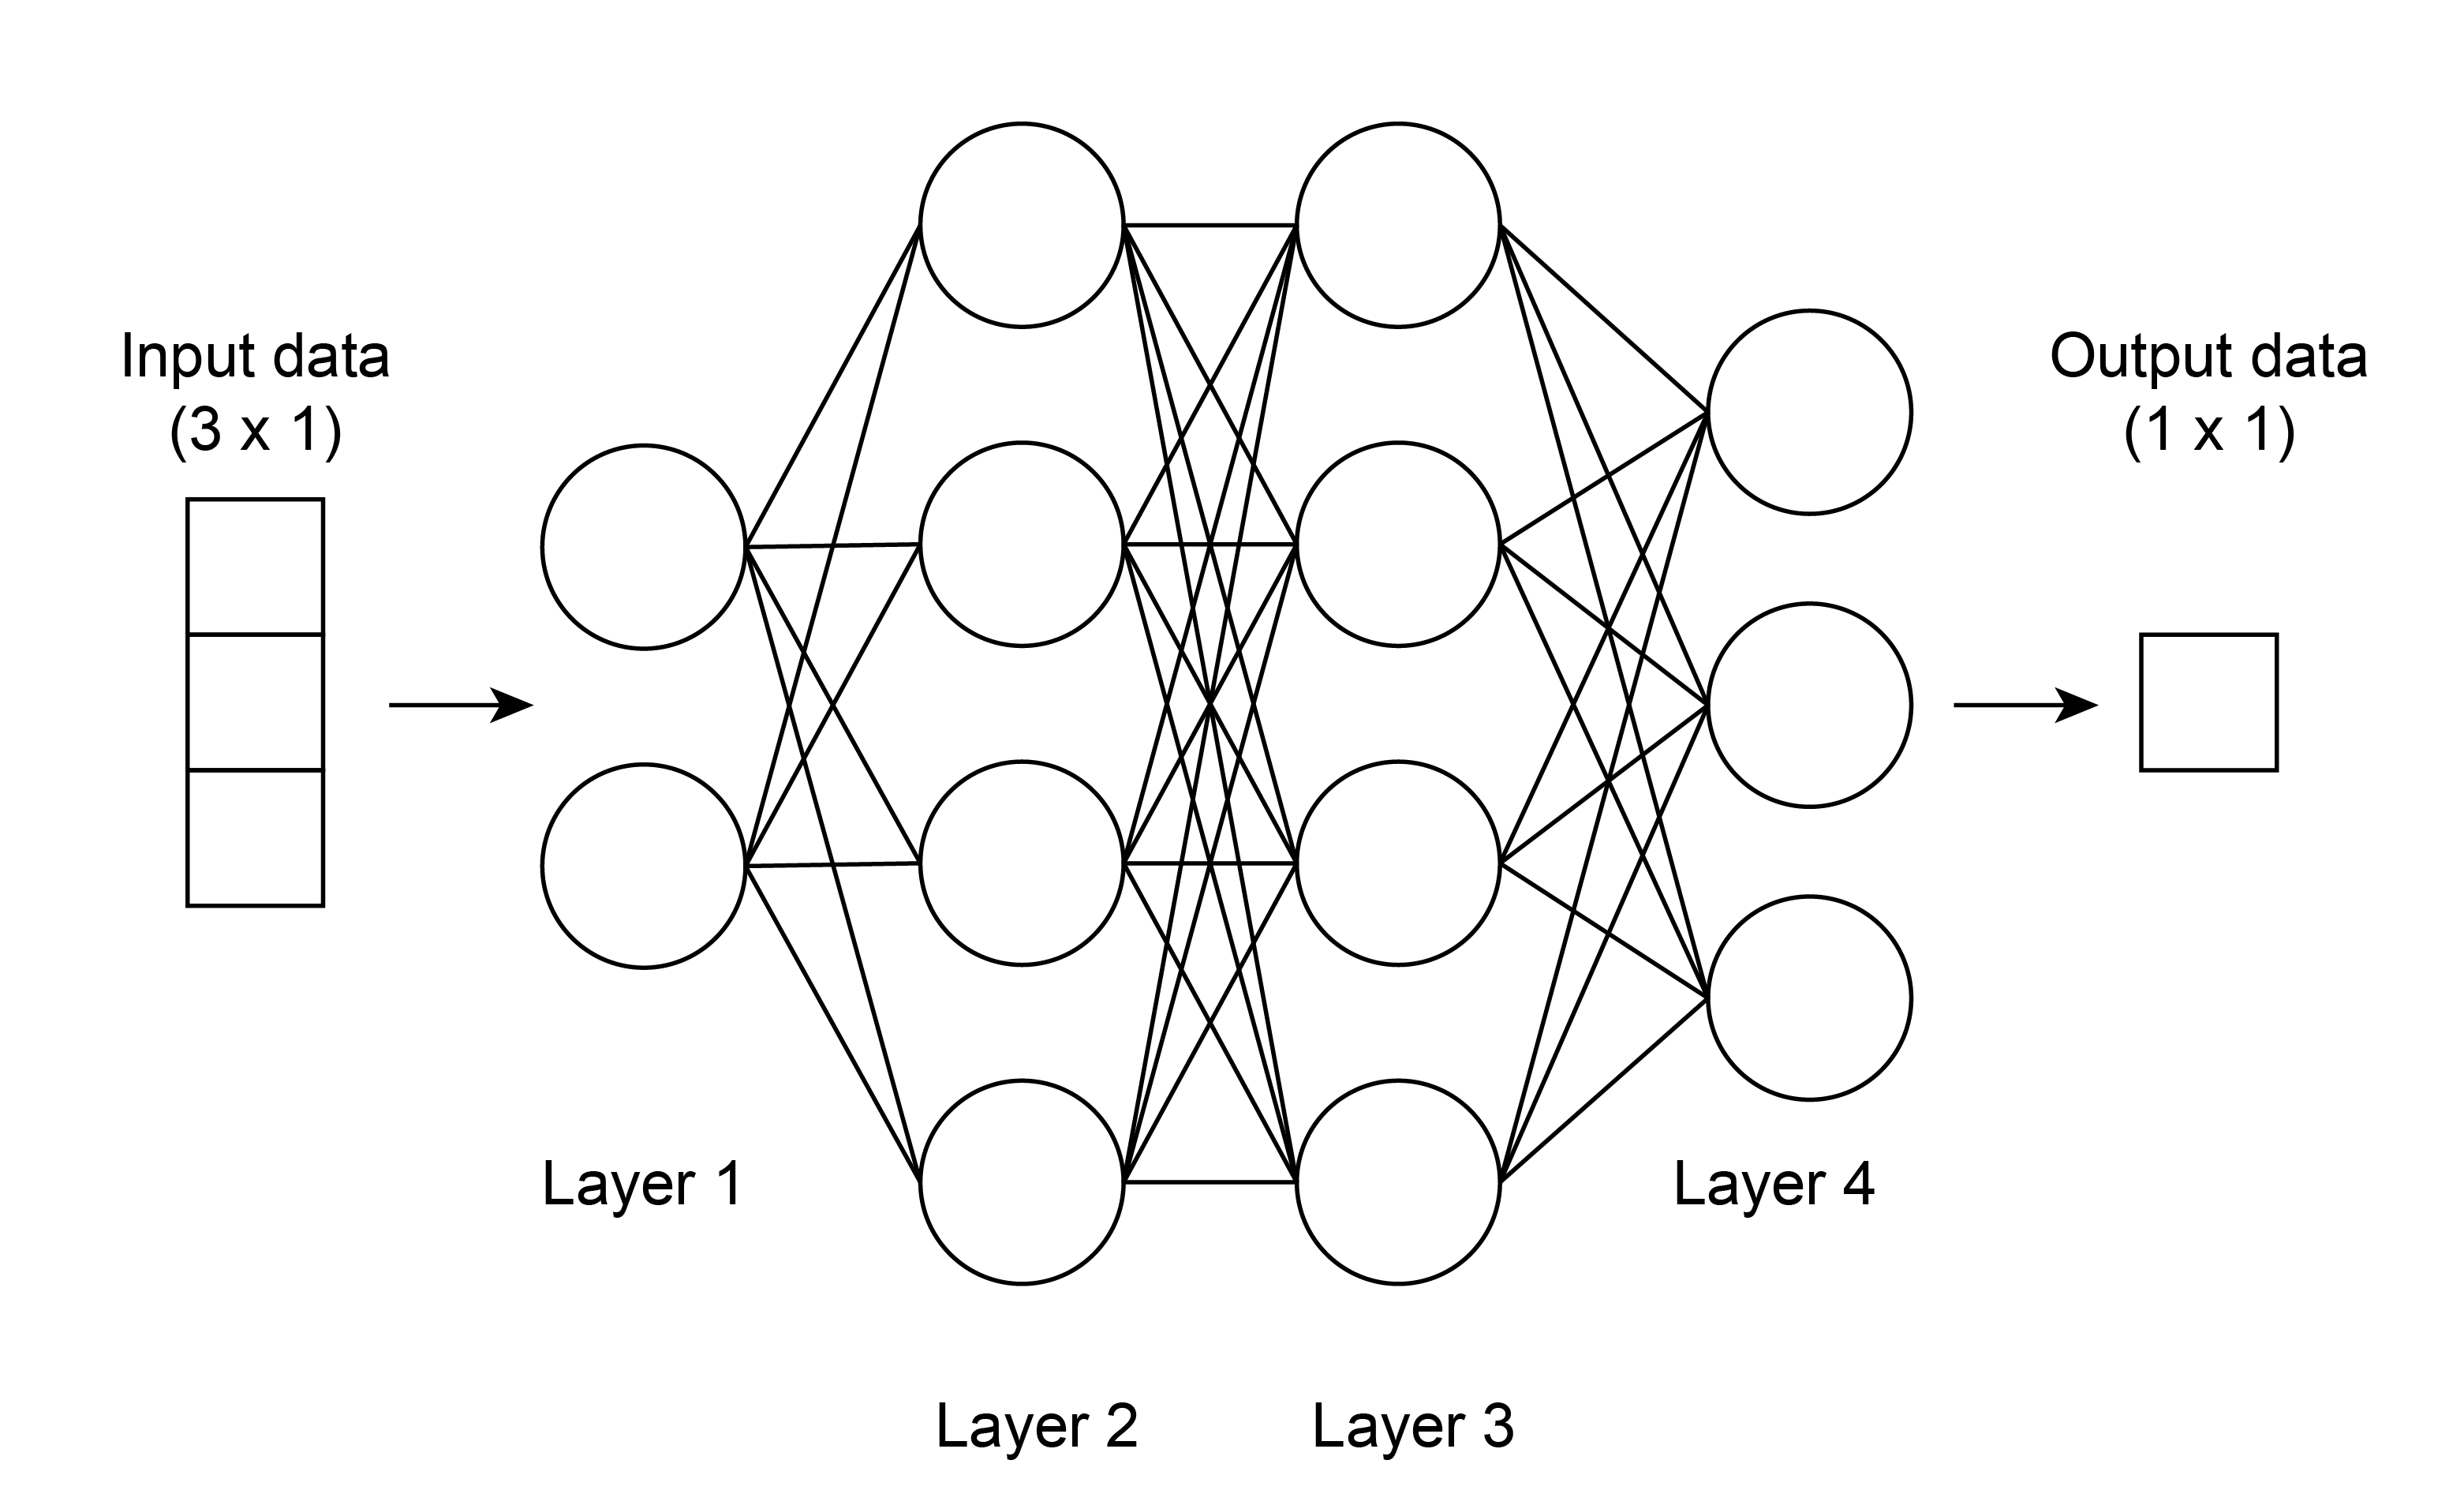

In [16]:
# Please fill out the Nones using anything appropriate (open question)
# Layer1 has 3 nodes; Layer2 has 4 nodes; Layer3 has 4 nodes; Layer4 has 2 nodes
# You should also have an output layer after Layer4
# HINT: Keep the shape requirements in mind

import numpy as np

np.random.seed(0)
x = np.random.randn(3, 1) # random input vector of three numbers (3x1)

# weights of each layer
W1 = np.random.randn(4, 3)  # layer 1 weights (4x3)
W2 = np.random.randn(4, 4)  # layer 2 weights (4x4)
W3 = np.random.randn(4, 4)  # layer 3 weights (4x4)
W4 = np.random.randn(2, 4)  # layer 4 weights (2x4)
W5 = np.random.randn(1, 2)  # output layer weights (1x2)
# bias of each layer
b1 = np.random.randn(4, 1)  # layer 1 bias (4x1)
b2 = np.random.randn(4, 1)  # layer 2 bias (4x1)
b3 = np.random.randn(4, 1)  # layer 3 bias (4x1)
b4 = np.random.randn(2, 1)  # layer 4 bias (2x1)
b5 = np.random.randn(1, 1)  # output layer bias (1x1)

def f(a):
   return 1 / (1 + np.exp(-a)) # write out sigmoid activation function in numpy (use sigmoid activation for all layers)

h1 = f(np.dot(W1, x) + b1)  # calculate first hidden layer activations (4x1)
h2 = f(np.dot(W2, h1) + b2) # calculate second hidden layer activations (4x1)
h3 = f(np.dot(W3, h2) + b3) # calculate third hidden layer activations (4x1)
h4 = f(np.dot(W4, h3) + b4) # calculate fourth hidden layer activations (2x1)
out = f(np.dot(W5, h4) + b5) # calculate output layer activations (1x1)
print(out)  # ouput should be one number (1x1)

[[0.58754102]]


# Question 2
(50 points)

**Q2 Build CNN by stacking layers** (50 points):  \
Write a Convolutional Neural Network (at least 10-layer deep) to classify all 10 classes of CIFAR10. Use training samples to train your model, use validation samples to validate your model, and use testing samples to evaluate the performance of trained model.

You should: **1**. Train the model for at least 10 epochs. **2**. Report the AUROC of each type of images in the test set (eg. AUC of airplane = 0.98) and plot the ROC curves.

**Note:** 1. Building blocks of CNN layers in Keras/Tensorflow and pytorch are recommended for this question. 2. You may also import/load fullsize existing architectures (eg. Inception, Resnet, VGG) from APIs, but you will only get 50% of the points for this question. 3. Loading pretrained models of any kinds or copying from the demo will get 0 point for this question.

In [17]:
#Fill in with your answer for Q2.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.2072 - loss: 2.1277 - val_accuracy: 0.3878 - val_loss: 1.6038
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3831 - loss: 1.6048 - val_accuracy: 0.4362 - val_loss: 1.5751
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5064 - loss: 1.3665 - val_accuracy: 0.5734 - val_loss: 1.2815
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5853 - loss: 1.1840 - val_accuracy: 0.6672 - val_loss: 1.0197
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6366 - loss: 1.0539 - val_accuracy: 0.6494 - val_loss: 1.0458
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6688 - loss: 0.9768 - val_accuracy: 0.7064 - val_loss: 0.8788
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6934 - loss: 0.9055 - val_accuracy: 0.6990 - val_loss: 0.8974
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7218 - loss: 0.8369 - val_accura

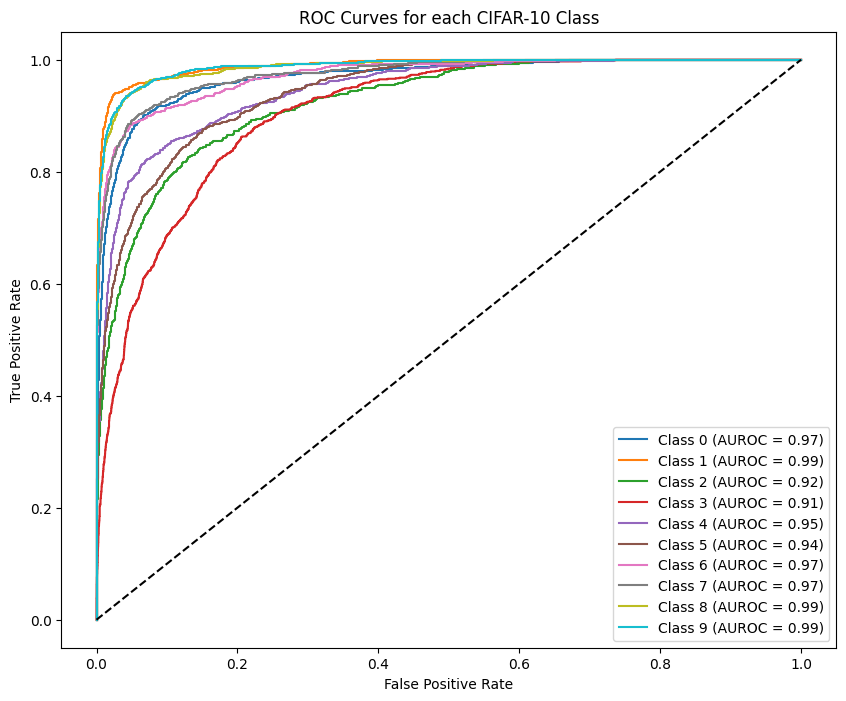

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# preprocess the data
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the images
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)  # One-hot encode the labels

# split off validation set from the training data
x_val, y_val = x_train[:5000], y_train[:5000]
x_train, y_train = x_train[5000:], y_train[5000:]

# define the CNN model
model = Sequential([
    # layer 1: Convolutional Layer
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    # layer 2: Convolutional Layer + Max Pooling
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    # layer 3: Convolutional Layer
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    # layer 4: Convolutional Layer + Max Pooling
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    # layer 5: Convolutional Layer
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    # layer 6: Convolutional Layer + Max Pooling
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # flatten the output
    Flatten(),

    # layer 7: Fully Connected Layer
    Dense(256, activation='relu'),
    Dropout(0.5),
    # layer 8: Fully Connected Layer
    Dense(128, activation='relu'),
    Dropout(0.5),
    # layer 9: Fully Connected Layer
    Dense(64, activation='relu'),
    # layer 10: Output Layer
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# evaluate the model and calculate AUROC for each class
y_pred = model.predict(x_test)

# calculate AUROC for each class
auroc_scores = []
for i in range(10):
    auroc = roc_auc_score(y_test[:, i], y_pred[:, i])
    auroc_scores.append(auroc)
    print(f'AUROC for class {i} = {auroc:.2f}')

# plot ROC curves for each class
fig, ax = plt.subplots(figsize=(10, 8))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUROC = {auroc_scores[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for each CIFAR-10 Class')
plt.legend(loc='best')
plt.show()

# Question 3
(30 points)

**Q3 Implement Grad-CAM** (30 points):  
Grad-CAM is a method for explaining the decisions of neural network based on the gradient of each predicted class wrt. the convolutional layer.

![](https://drive.google.com/uc?export=view&id=1grD1Jv76fG8UqS5dNVfhm7FsG6PRNExb)

[Grad-CAM paper](https://arxiv.org/abs/1610.02391)

We'll walk you through how to code Grad-CAM and provide an abundance of helper code. Ultimately, our goal here is to understand how one can track gradients in tensorflow. Replace the "None" with your code. For grading purposes, each is worth 3.33 points.

In [19]:
#Instantiate a VGG16 model pretrained on imagenet.
import tensorflow as tf
model = tf.keras.applications.vgg16.VGG16()
model.summary() #Notice how model.summary() give a description of each layer, and how each are connected to one another.

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

--2024-11-26 18:11:12--  https://raw.githubusercontent.com/keisen/tf-keras-vis/master/docs/examples/images/bear.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75354 (74K) [image/jpeg]
Saving to: ‘bear.jpg.1’

bear.jpg.1          100%[===================>]  73.59K  --.-KB/s    in 0.002s  

2024-11-26 18:11:12 (47.6 MB/s) - ‘bear.jpg.1’ saved [75354/75354]



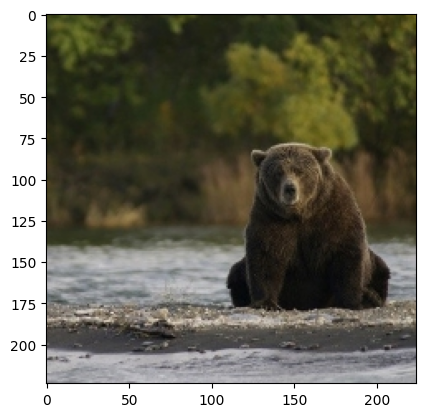

In [20]:
#Now let's download a picture of a bear. This is one of the 1000 classes that VGG16 was pretrained on:
!wget https://raw.githubusercontent.com/keisen/tf-keras-vis/master/docs/examples/images/bear.jpg
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import cv2

bear = Image.open('/content/bear.jpg')
bear = np.asarray(bear)
plt.imshow(bear)

A core portion of the Grad-CAM strategy is to calculate the gradients of the prediction class with respect to the values outputted from the last convolutional layer. Thankfully we won't have to calculate gradients by hand - we'll use a nifty tensorflow function to handle it. However, to make our lives easier, we should consider separating our VGG16 model into two individual components:


*   The first model will pass the bear image all the way up until the last convolutional layer.
*   The second model will pass the output of the last convolutional layer all the to the prediction output layer (the last layer).

Again we're just splitting the VGG16 model into two components - being able to track the output of the last convolutional layer will in turn allow us to calculate the gradients with respect to the layer of interest.



In [21]:
# preprocessing code
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
bear_input = np.expand_dims(bear, axis=0)
bear_input = preprocess_input(bear_input)

In [22]:
#Here we will code up the first bullet point mentioned above.
#The code below will find the last convolutional layer, in this case it should be block5_conv3
layerName = 'conv'
last = [(idx,layer) for idx,layer in enumerate(model.layers) if (layerName in layer.name)][-1]
last_conv_layer = last[1]
print(last_conv_layer.name)

#Now, create a tf keras Model object where the input is the original model's input, and the output is the last_conv_layer's output:
#If you succeed, when you print last_conv_layer_model.summary(), you will see the last layer is "block5_conv3".
#The remaining layers from block5_pool onwards have been removed.
last_conv_layer_model = tf.keras.Model(inputs=model.input, outputs=last_conv_layer.output) #Replace None and None with your answers
print(last_conv_layer_model.summary())

block5_conv3


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

None


In [23]:
#Now let's code up the second bullet point mentioned above.
#Build the remainder of the model after the last Conv2d layer (block5_conv3) and onwards to the prediction layer.
#Let's start with some helper code:
classifier_input = tf.keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for i in range(last[0]+1,len(model.layers)):
    x = model.layers[i](x)

classifier_model = tf.keras.Model(inputs=classifier_input, outputs=x) #Replace None and None with your answers
print(classifier_model.summary()) #If you did this correctly, the first layer will have an output shape of [(None, 14, 14, 512)]  and the last layer will be our dense prediction layer (shape of (None, 1000))

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ predictions (Dense)                  │ (None, 1000)                │       4,097,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,642,856 (471.66 MB)

 Trainable params: 123,642,856 (471.66 MB)

 Non-trainable params: 0 (0.00 B)

None


In [24]:
#Now the fun part: let's calculate the gradients of the bear class with respect to the outputs of the last convolutional layer:
with tf.GradientTape() as tape:
    last_conv_layer_output = last_conv_layer_model(bear_input)  # Pass image through the first model
    tape.watch(last_conv_layer_output)  # Watch the output of last conv layer for gradient calculation #Here, we will ask the tensorflow gradient tape to watch our input variable. Replace None with the variable that we want to calculate our gradients with respect to.

    preds = classifier_model(last_conv_layer_output) #Now that we have captured the output of the last convolutional layer, we want to pass that through the rest of the model all the way to the prediction layer. Replace None to do just that.

    #Here's some helper code. We're going to find the index with the maximum prediction (and assume that is the correct bear class) and extract the probability from that class
    top_pred_index = tf.argmax(preds[0])
    top_pred_prob = preds[:,top_pred_index]

#Here is where we actually calculate the gradients. Replace None and None with the correct variables. Again, we want to calculate the gradient of the prediction probability output from the bear class with respect to the outputs of the last convolutional layer
grads = tape.gradient(top_pred_prob, last_conv_layer_output)

In [25]:
#Great job! We're almost there, just a few steps left:

#We need to pool these gradient values across each feature map, so one mean value for each filter. We'll provide the code to do that here:
pooled_grads = tf.reduce_mean(grads,axis=(0,1,2)).numpy()

#Now, we want to multiply each respective filter between last Conv2D output and the average gradient score for that filter. We'll provide the code to do that here:
last_conv_layer_output_numpy = last_conv_layer_output.numpy()[0]
for i in range(pooled_grads.shape[-1]):
    last_conv_layer_output_numpy[:,:,i] *= pooled_grads[i]

#Mean is taken over the filters, so now you get a standard x by x image
heatmap = np.mean(last_conv_layer_output_numpy,axis=-1)
#ReLU and normalize
heatmap = np.maximum(heatmap,0)/np.max(heatmap)
#Rescale heatmap matrix back to original image size, more useful later for overlaying it with original image
heatmap = cv2.resize(heatmap,dsize=(224,224),interpolation=cv2.INTER_CUBIC)

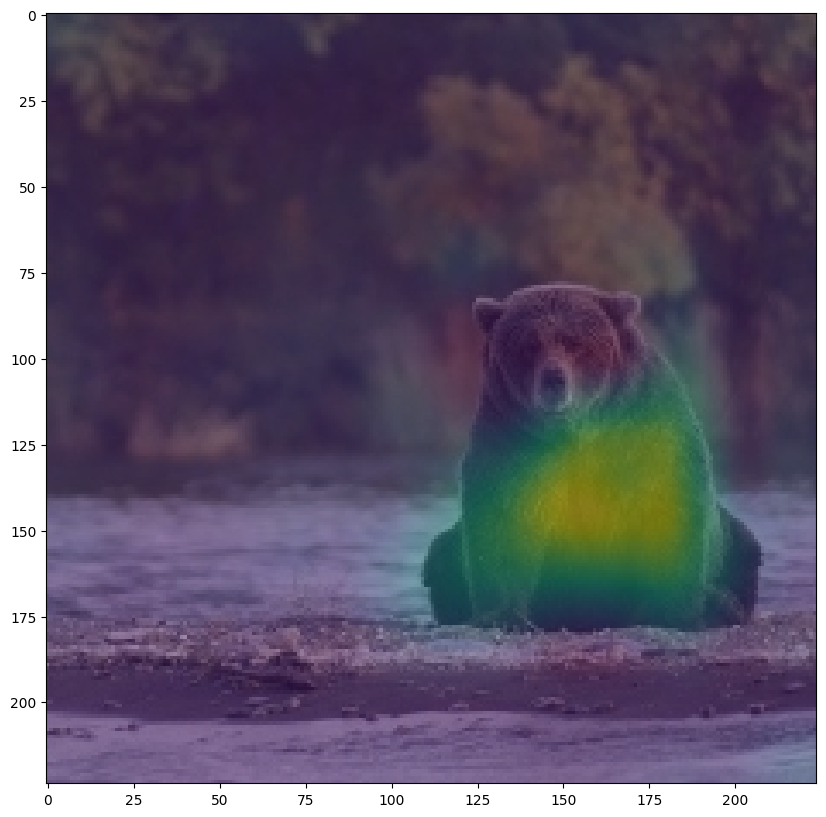

In [26]:
#Now let's visualize that heatmap overlaid the original image:
from matplotlib import pyplot as plt

plt.figure(figsize = (10,10))
plt.imshow(bear)
plt.imshow(heatmap, alpha=0.5)

#If you coded this correctly, you should a heatmap with intense coloration around/within the bear.
#Here's a sample output we got when we ran through this code: https://drive.google.com/file/d/1PpEOMoP3y75Prq0CafEZb6LN5fLimy-a/view?usp=sharing

# Question 4
(15 points extra credit)

In [13]:
## There are a ton of helper functions in here. RUN THIS CELL before you start
## NO MODIFICATIONS are needed, but you're welcome to toy with it if interested

%%capture
from tensorflow.keras.datasets import cifar10
(train_set_images, train_set_labels), (test_set_images, test_set_labels) = cifar10.load_data()
validation_set_images = train_set_images[:10000]
validation_set_labels = train_set_labels[:10000]
train_set_images = train_set_images[10000:]
train_set_labels = train_set_labels[10000:]

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import numpy as np
# Updated import for ImageDataGenerator:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform

# A pretrained initialModel to work with.
!wget http://3.84.176.207:3838/submodel-32-32-64.zip
!unzip -o /content/submodel-32-32-64.zip

class Patches(layers.Layer):
    def __init__(self, patch_size, image_size):
        super().__init__()
        self.patch_size = patch_size
        self.image_size = image_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, int((self.image_size[0]/self.patch_size)**2), self.patch_size,self.patch_size,self.image_size[2]])
        return patches

data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(256,256),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)

class GlobalAvgPoolAcrossTime(layers.Layer):
    def __init__(self, **kwargs):
        super(GlobalAvgPoolAcrossTime, self).__init__(**kwargs)

    # (Batch_size, time, y, x, channels) -> (Batch_size, 1, y, x, channels)
    def call(self, inputs):
        return keras.backend.mean(inputs, axis=[-2,-3], keepdims=False)

class GlobalAvgPoolAcrossLast(layers.Layer):
    def __init__(self, **kwargs):
        super(GlobalAvgPoolAcrossLast, self).__init__(**kwargs)

    # (Batch_size, time, y, x, channels) -> (Batch_size, 1, y, x, channels)
    def call(self, inputs):
        return keras.backend.mean(inputs, axis=-1, keepdims=False)

data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(256,256),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)

def identity_block(X, f, filters, stage, block):

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

def convolutional_block(X, f, filters, stage, block, s=2):

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

KeyboardInterrupt: 

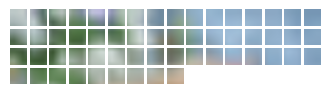

In [14]:
from matplotlib import pyplot as plt

# We have provided a Patches class that "patches" images into a pre-defined grid.
# Here we see an example of this:

patch_size = 16 ## Feel free to play around with this value, it should be a multiple of 256, and <= 256.
resized_image = tf.image.resize(
    tf.convert_to_tensor([test_set_images[250]]), size=(256, 256)
)
patches = Patches(patch_size,resized_image[0].shape)(resized_image)
n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

**QUESTIONS:**

What is the pixel dimension of each patch? (1 point)

How many total patches are created with patch_size=16? (2 points)



In [ ]:
## Initialize a pre-trained ResNet50 stage2 portion (contains 1 convolutional
## block, and 2 identity blocks)with the patch input layer. This training
## process is very slow, so we recommend importing a pre-trained version we
## already created for you, but will include the code should you want to create
## it from scratch (and/or) if you want to change the patch size:

training = False
patch_size = 16

if training:
  input = tf.keras.layers.Input((train_set_images[0].shape))
  augmented = data_augmentation(input)
  patch = Patches(patch_size)(augmented)

  # Normally, the # of filters should be 64,64,256, but we've made it smaller
  # to run it more feasibly on Colab.
  X = convolutional_block(patch, f=3, filters=[32,32,64], stage=2, block='a', s=1)
  X = identity_block(X, 3, [32,32,64], stage=2, block='b')
  X = identity_block(X, 3, [32,32,64], stage=2, block='c')

  initialModel = tf.keras.Model(inputs=input,outputs=X)
else:
  initialModel = tf.keras.models.load_model('/content/submodel-32-32-64')
  # Since this portion of the model has already been trained, we do not want backpropagation to change these values
  initialModel.trainable=False


# This model starts with a (32,32,3) input, followed by a resize to
# (256,256,3) and data augmentation. The third layer creates the Patches.
# Since we want 16x16 patches, each 256x256x3 becomes divided into 256 16x16 patches
# Each patch is then fed forward through the ResNet50 stage2 model to extract
# relevant imaging signals. We can also see that the last layer outputs a tensor
# of size (256,64), where the 256 represents the 256 patches, and 64 represents
# the compressed latent vectors.
initialModel.summary()

For ALL of the below code, fill in "None" with the correct values. All "None" values should be replaced with something. 2 points each!

In [ ]:
# Extract the output from the initialModel
pool = initialModel.output

# Add positional embedding
position_embedding = tf.keras.layers.Embedding(input_dim=patch_size*patch_size, output_dim=64)
positions = tf.range(start=0, limit=patch_size*patch_size, delta=1)
encoded = pool + position_embedding(positions)

# Pass this into attention
# HINT: we are doing self-attention, so the two values should be the same
attention,weights = tf.keras.layers.MultiHeadAttention(num_heads=1,key_dim=64)(None,None,return_attention_scores=True)

# The output of attention will be [batch_size, # of patches, # of dims]. Average over the last axis:
pool = GlobalAvgPoolAcrossLast()(attention)

# Connect to dense layer
pred = tf.keras.layers.Dense(units=None)(None)

# Final model
finalModel = tf.keras.Model(inputs=None,outputs=None)
finalModel.summary()

In [ ]:
# Now we train!
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
finalModel.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )
finalModel.fit(x=train_set_images,y=train_set_labels,batch_size=32,epochs=2,validation_data=(validation_set_images,validation_set_labels))

In [ ]:
# Now trained, we want to output just the weights from that attention layer.
# To do that in tensorflow, we will create a new Model object that ends
# earlier at the attention layer:

model2 = tf.keras.Model(inputs=finalModel.input,outputs=finalModel.layers[None].output)
outputs = model2.predict(np.asarray([test_set_images[250]]))
attention_outputs = outputs[None]

from matplotlib import pyplot as plt
fig,ax = plt.subplots(1,2)
ax[0].imshow(test_set_images[250])
ax[1].imshow(np.median(attention_outputs[0,0,:,:],axis=1).reshape(16,16))

## Here's a screenshot of what we got: https://drive.google.com/file/d/14PqojtO0_7bOFRF5kKhNmFRsjfkb4L15/view